<a href="https://colab.research.google.com/github/atulpatil2228/Pw_ML_learning/blob/main/8_Support_Vector_Regressor_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## Support vector Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

<Axes: xlabel='0', ylabel='1'>

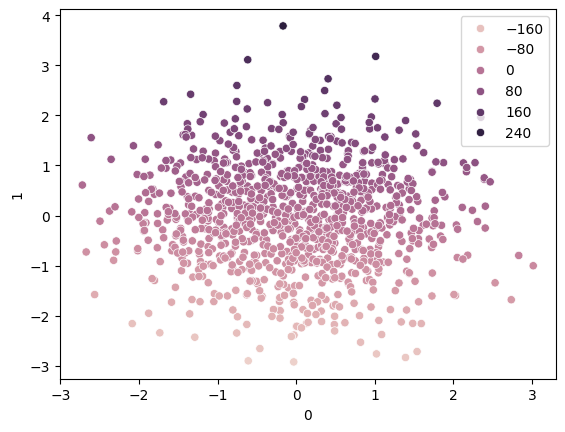

In [3]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[ 6.71203598, 64.23144072]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([-1.04316630e+02,  1.65255616e+01, -7.03611597e+01,  4.81580364e+01,
       -7.80714396e+01, -7.27134711e+01, -5.95171335e+01, -1.17091925e+01,
       -3.60587739e+00,  4.52267121e+01, -2.21375653e+01, -2.93245599e+00,
        6.78348363e+01, -1.46902445e+01, -5.08539634e+01, -3.69762332e+01,
       -8.76224169e+01,  2.60968481e+01, -1.49495795e+01,  8.78349408e+01,
        2.14156321e+01,  4.95951504e+01, -2.95161668e-01,  1.31089081e+01,
        8.54491683e+01,  4.88443988e+01, -3.56428178e+01,  4.03730507e+01,
       -1.00348264e+02,  1.07514268e+01, -3.33917483e+01,  3.45714816e+01,
       -1.07262791e+00,  2.51562981e+01,  3.29645405e+01, -6.09369647e+00,
       -1.64559967e+02,  3.31592191e+01,  3.55658547e+01, -2.55036372e+01,
       -1.38080722e+01, -6.10850673e+01,  4.56449586e+00, -1.27288182e+02,
        2.21104879e+01,  1.13557851e+01, -4.78004880e+01, -2.69638984e+01,
        8.71912091e+00,  4.06840298e+00,  2.10021442e+01,  3.61981594e+01,
        3.72489194e+01,  

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9978195365595641

In [18]:
#hyperparamter tuning with svr

from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear'],
         'epsilon': [0.01, 0.1, 0.2, 0.3]}


grid = GridSearchCV(SVR(), param_grid=params, cv = 5, verbose = 3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.916 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.916 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
grid.best_score_

np.float64(0.9978765749886183)

In [23]:
y_pred = grid.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.9978962600557237